# Objetivo 2

### 2.2 Viagante Caixeiro

O Algoritmo genético possui as seguintes fases:

Criação de uma população inicial, 
Determinação do "fitness", 
Seleção dos pais para procriação , 
Procriação, 
Mutação , 
Repetição do ciclo por x gerações, 

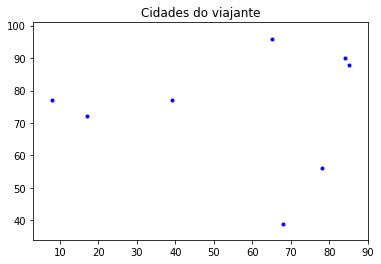

[(68, 39), (85, 88), (17, 72), (39, 77), (8, 77), (78, 56), (65, 96), (84, 90)]


In [21]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#coordenadas dos locais em que o veículo deverá passar
x = [8,0,3,2,1,9,7,4,10,2,5,4,8,8,2,5,5,7,8,8]
y = [1,7,7,2,3,5,10,4,6,8,8,3,6,7,9,10,6,2,2,3]


def get_data(n=8):


    x = [random.randint(1,100) for _ in range(n)]
    y = [random.randint(1,100) for _ in range(n)]

    # matrix de Zeros (n,n)
    distancias = np.zeros((n,n)) 

    # Matrix com dados altos
    a = 1000*np.identity(n,int)
    lista_coordenadas = []

    #Calcular a distancia entre os pontos
    for i in range(0,n):
        lista_coordenadas.append((x[i], y[i]))
        for j in range(0,n):
            distancias[i,j] = a[i,j]+math.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
            
    
    return lista_coordenadas, distancias, x, y

        
def print_grafico(x, y):
    xmin, xmax = min(x)-5, max(x) + 5
    ymin, ymax = min(y)-5, max(y) + 5
    plt.title("Cidades do viajante")
    plt.plot(x,y, 'b.')
    plt.axis([xmin, xmax, ymin, ymax])
    plt.show()
    
lista_coordenadas, distancias, x, y = get_data(n=8)
print_grafico(x, y)
print(lista_coordenadas)

In [11]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # Calcula a distância euclidiana
    def distance(self, toCity):
        return ((self.x - toCity.x) ** 2 + (self.y - toCity.y) ** 2) ** 0.5

    # Imprime as coordenadas como (x,y)
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                
                # precisa terminar na cidade onde começou, então faz essa verificação
                # se não for o último nó, adiciona a próxima "cidade" a ser visitada
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                # caso contrário, é o último nó e atribui o primeiro nó visitado
                else:
                    toCity = self.route[0]
                
                # calcula a distância entre a cidade inicial e a próxima 
                
                pathDistance += fromCity.distance(toCity)

            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness
    
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

# A função de seleção recebe como primeiro parâmetro a saída da função rankRoutes
# para determinar qual rota utilizar
def selection(popRanked, eliteSize):
    selectionResults = []
    # Aqui é feito o cálculo de peso relativo de aptidão para cada indivíduo
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    # Adição do elitismo
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    # Aqui é feita a comparação de um número aleatório com esses pesos relativos
    # de aptidão para selecionar os indivíduos para a etapa de "Procriação"
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

# Essa função pega o resultado da nossa seleção anterior e busca estes indivíduos
# da nossa população
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    # Aqui é feita a escolha do subconjunto aleatório do primeiro pai
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    # Se o gene não existe no primeiro pai, então pega do segundo pai
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    # Aqui novamente usamos o elitismo para manter as melhores rotas/indivíduos 
    for i in range(0,eliteSize):
        children.append(matingpool[i])
    # Aqui utilizamos a função de breed mencionada acima para preencher o resto
    # dos indivíduos
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

# Aqui a mutação é aplicada na população
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        popRanked = rankRoutes(currentGen)
        selectionResults = selection(popRanked, eliteSize)
        matingpool = matingPool(currentGen, selectionResults)
        children = breedPopulation(matingpool, eliteSize)
        pop = mutatePopulation(children, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

### 2.2 N-Rainhas

In [15]:
import random
from scipy import special as sc
import itertools

#class algoritmoGenetico:

def fitness_score(seq):
    #Classifica a sequencia
    score = 0

    for row in range(NUM_QUEENS):
        col = seq[row]

        for other_row in range(NUM_QUEENS):
            if other_row == row:
                continue
            if seq[other_row] == col:
                continue
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            
            score += 1
    return score/2

def selection(populacao):
    # Seleciona os individuos para serem parentes
    parentes = []

    #selecionar os parentes com probabilidade propocional ao seu fitness score
    # valor aleatorio entre 0 e a combinacao do numero de rainhas com 2 *2
    for ind in populacao:
        if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):
            parentes.append(ind)
    
    return parentes

def crossover(parentes):
    
    #random indexes
    cross_points = random.sample(range(NUM_QUEENS), MIXING_NUMBER - 1)
    offsprings = []

    permutations = list(itertools.permutations(parentes, MIXING_NUMBER))
    for perm in permutations:
        offspring = []
        start_pt = 0

        for parent_idx, cross_point in enumerate(cross_points):

            #sub-list de pais
            parent_part = perm[parent_idx][start_pt:cross_point]
            offspring.append(parent_part)

            #atualizar o indexes
            start_pt = cross_point

        #ultimo parente
        last_parent = perm[-1]
        parent_part = last_parent[cross_point:]
        offspring.append(parent_part)
        
        offsprings.append(list(itertools.chain(*offspring)))

    return offsprings

def mutate(seq):
    #obter valores alearios da sequencia
    for row in range(len(seq)):
        if random.random() < TAXA_MUTACAO:
            seq[row] = random.randrange(NUM_QUEENS)

    return seq

def funcao_print(populacao, to_print=True):
    #Mostra as as solucoes e as suas pontuacoes
    for ind in populacao:
        score = fitness_score(ind)
        
        if score == sc.comb(NUM_QUEENS, 2):
            print('Solution found')
            print(f'{ind}. Score: {score}')
            return True
    return False

def evolucao(populacao):
    
    #selecionar individuos para ser parentes
    parentes = selection(populacao)
    
    #recombination. Create new offsprings
    offsprings = crossover(parentes)
    
    #mutation
    offsprings = list(map(mutate, offsprings))
    
    #Para manter os individuos com melhor score
    new_gen = offsprings

    for ind in populacao:
        new_gen.append(ind)
    
    #Ordenar a nova geracao consoante o seu fitness score
    new_gen = sorted(new_gen, key=lambda ind: fitness_score(ind), reverse=True)[:POPULACAO_SIZE]
    return new_gen

def populacao_inicial():
    populacao = []

    for individual in range(POPULACAO_SIZE):
        new = [random.randrange(NUM_QUEENS) for idx in range(NUM_QUEENS)]
        populacao.append(new)

    return populacao

#Constants, experiment parameters
NUM_QUEENS = 8
POPULACAO_SIZE = 10
MIXING_NUMBER = 2
TAXA_MUTACAO = 0.05
# Running the experiment
geracao = 0

# Generate random population
populacao = populacao_inicial()

#print_found_goal(population)
    
while not funcao_print(populacao):
    #print('Geracao:', geracao)
    funcao_print(populacao)
    populacao = evolucao(populacao)
    geracao += 1

Solution found
[6, 0, 2, 7, 5, 3, 1, 4]. Score: 28.0
